In [41]:
# Load Python libraries
from sklearn import metrics, ensemble
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [42]:
# Load data
path1=r'C:/Users/18401/Desktop/MAFS6100S/train.csv'
df = pd.read_csv(path1)

In [43]:
# 1% sample of items
df = df.sample(frac=0.01)

In [44]:
# Load and join songs data
path2=r'C:/Users/18401/Desktop/MAFS6100S/songs.csv'
songs = pd.read_csv(path2)
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join members data
path3=r'C:/Users/18401/Desktop/MAFS6100S/members.csv'
members = pd.read_csv(path3)
df = pd.merge(df, members, on='msno', how='left')
del members

In [45]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [46]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [47]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

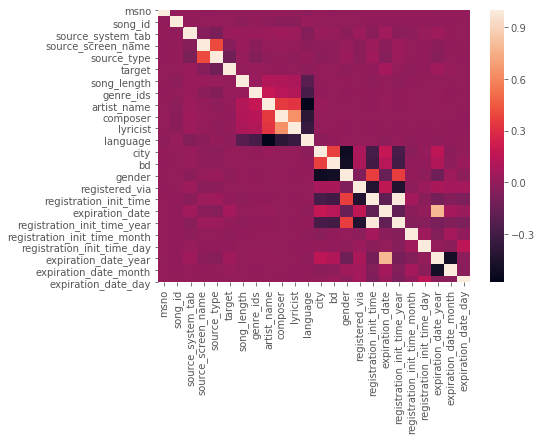

In [48]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [49]:
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)

In [50]:
# Train & Test split

target = df.pop('target')
train_data1, test_data1, train_labels1, test_labels1 = train_test_split(df, target, test_size = 0.3)

In [52]:
from sklearn.metrics import roc_curve, auc  ###roc/auc
# Compute ROC curve and ROC area for each class
def ROC_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
 
    plt.show()

              precision    recall  f1-score   support

           0       0.60      0.55      0.57     10904
           1       0.59      0.64      0.62     11229

    accuracy                           0.60     22133
   macro avg       0.60      0.59      0.59     22133
weighted avg       0.60      0.60      0.59     22133



<Figure size 432x288 with 0 Axes>

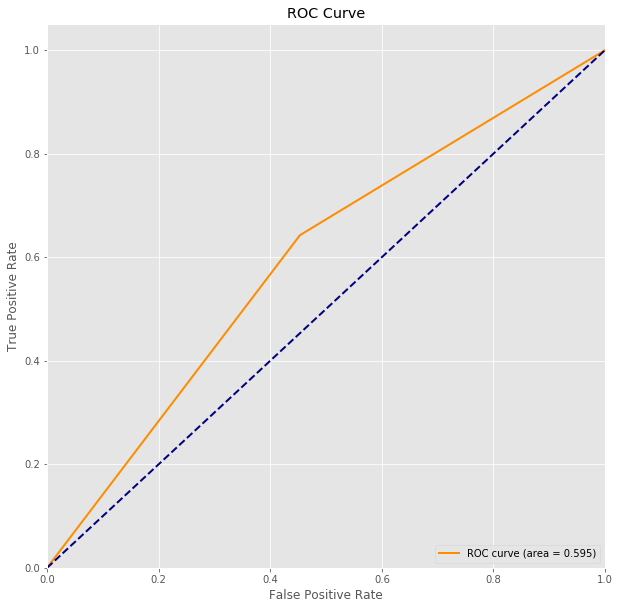

In [54]:
############################## Logistic Regression
############Logistic Regression
##gridsearchcv
#model = LogisticRegression()
# Create parameters grid
#parameters_grid = { 'penalty' : ['l1','l2' ], 'C' : [0.1,0.2,0.5,1] }
# Strategy of cross validation
#cv = 5
# Create Grid search Strategy
#grid_cv = RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy',cv=cv)
# Fit model by Grid
#grid_cv.fit(train_data1, train_labels1)
# Model with the best estimator
#grid_cv.bestestimator

modelLR=LogisticRegression(penalty='l1',C=1)
modelLR.fit(train_data1,train_labels1)
modelLR.score(test_data1,test_labels1)
predict_labels_LR = modelLR.predict(test_data1)

print(metrics.classification_report(test_labels1, predict_labels_LR))
ROC_curve(test_labels1, predict_labels_LR)

In [ ]:
##############################Random Forest 
###randomgridCV
# Create model
#model = ensemble.RandomForestClassifier()
# Create parameters grid
#parameters_grid = {  'max_depth' : [5, 10, 15,25], 'n_estimators' : [150, 250, 300]}
# Strategy of cross validation
#cv = 5
# Create Grid search Strategy
#grid_cv = RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)
# Fit model by Grid
#grid_cv.fit(train_data, train_labels)
# Model with the best estimator
#grid_cv.bestestimator

In [51]:
# Model with the best estimator
modelrf = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
modelrf.fit(train_data1,train_labels1)
predict_labels_rf = modelrf.predict(test_data1)
print(metrics.classification_report(test_labels1, predict_labels_rf ))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62     10904
           1       0.64      0.66      0.65     11229

    accuracy                           0.64     22133
   macro avg       0.64      0.64      0.64     22133
weighted avg       0.64      0.64      0.64     22133



<Figure size 432x288 with 0 Axes>

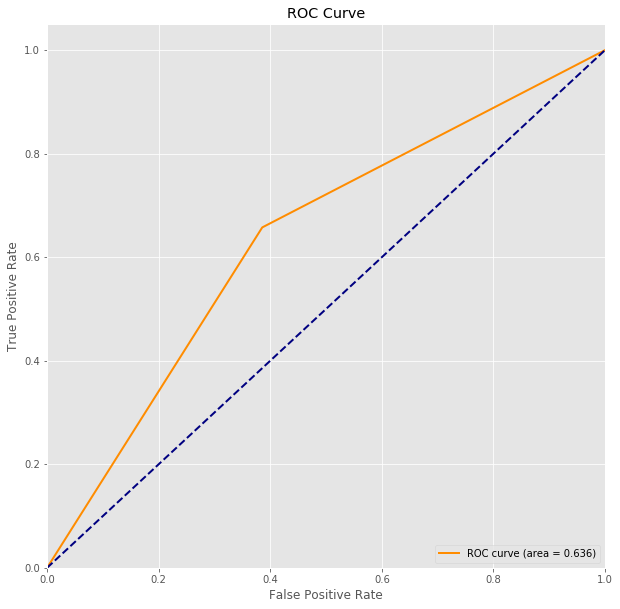

In [53]:
ROC_curve(test_labels1,predict_labels_rf)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     10904
           1       0.63      0.65      0.64     11229

    accuracy                           0.63     22133
   macro avg       0.63      0.63      0.63     22133
weighted avg       0.63      0.63      0.63     22133



<Figure size 432x288 with 0 Axes>

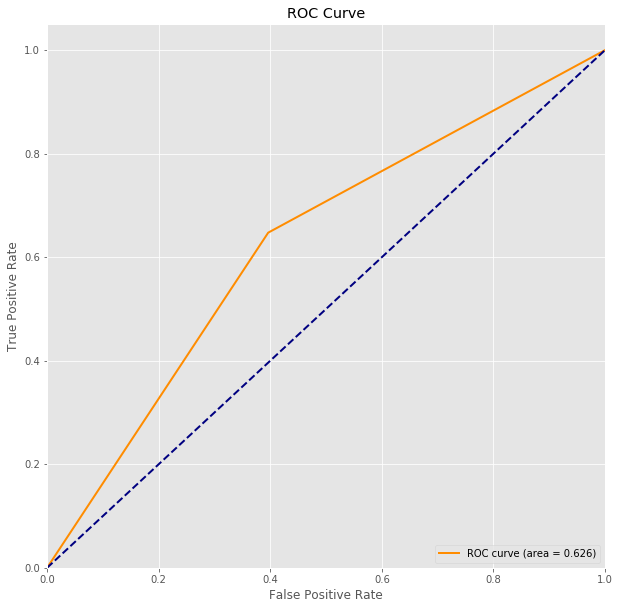

In [56]:
################################XGBoost
# gridsearchcv
#model = xgb.XGBClassifier()
# Create parameters grid
#parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }
# Strategy of cross validation
#cv = 5
# Create Grid search Strategy
#grid_cv = RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)
# Fit model by Grid
#grid_cv.fit(train_data, train_labels)
# Model with the best estimator
#grid_cv.bestestimator
modelxgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
modelxgb.fit(train_data1, train_labels1)
# Predicting
predict_labels_xgb = modelxgb.predict(test_data1)

print(metrics.classification_report(test_labels1, predict_labels_xgb))
ROC_curve(test_labels1, predict_labels_xgb)

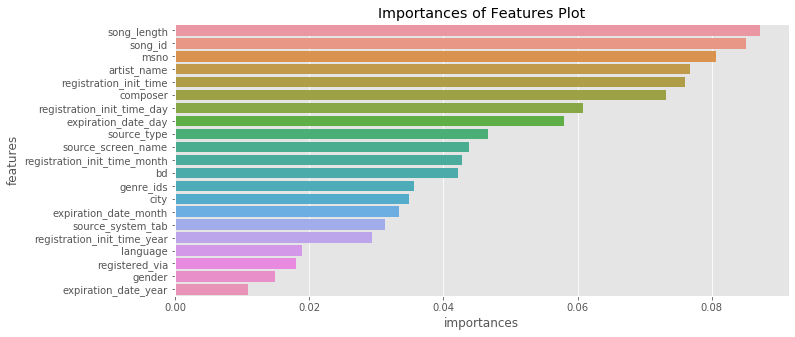

In [57]:
#########Feature importances from random forest model
df_plot = pd.DataFrame({'features': train_data1.columns,
                        'importances': modelrf.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()